<a href="https://colab.research.google.com/github/davism02/Project-4-Predicting-Hospial-Readmission-for-Diabetes/blob/main/diabetes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Hospital Readmittance < 30 days

## Cleaning the Data

In [1]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('resources/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.shape

(101766, 50)

In [4]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [5]:
# Drop weight, payer_code and medical_specialty columns due to number of "?" values
df.drop(['weight','payer_code','medical_specialty'], axis=1, inplace=True)
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [6]:
# Replace remaining "?"" values with 
df = df.replace("?",np.nan)
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [7]:
# Drop remaining null values
df = df.dropna()
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [8]:
df.shape

(98053, 47)

## Readmitted is our target value
- If the patient was readmitted in less than 30 days "<30"
- If the patient was readmitted in more than 30 days ">30"
- No readmission = "NO"

In [9]:
# Get probability of output value
df['readmitted'].value_counts()/len(df)

NO     0.533773
>30    0.353370
<30    0.112857
Name: readmitted, dtype: float64

### Convert target value to binary: 1 or 0
- 0 = Other: Readmitted after 30 days and no readmission (>30, NO)
- 1 = Early readmission (<30)

In [10]:
# Convert readmitted column to binary field for target output
df.replace({'readmitted': {"NO": 0, ">30": 0, "<30": 1}}, inplace= True)
df

C:\Users\laure\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [11]:
# Show count of output value
df['readmitted'].value_counts()

0    86987
1    11066
Name: readmitted, dtype: int64

C:\Users\laure\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


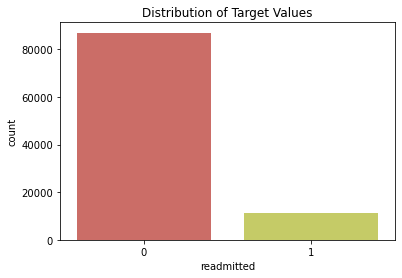

In [12]:
# Visualize count of output value
sns.set_palette("hls")
sns.countplot(df['readmitted'], data = df)
plt.title("Distribution of Target Values")
plt.show();

Readmitted after 30 days or have no readmission (>30, NO). This distribution shows that the target variable is imbalanced. There are many more values for Class 1 than Class 0.

## Feature Exploration

### EDA - Race

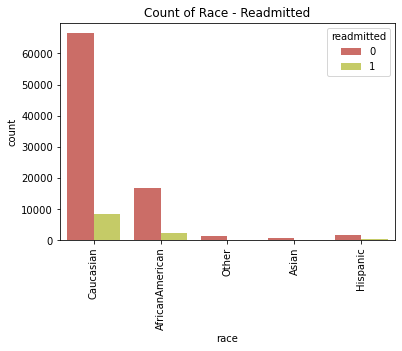

In [13]:
# Show distribution of race
sns.set_palette("hls")
sns.countplot(x='race', hue= "readmitted", data = df)
plt.xticks(rotation=90)
plt.title("Count of Race - Readmitted")
plt.show()

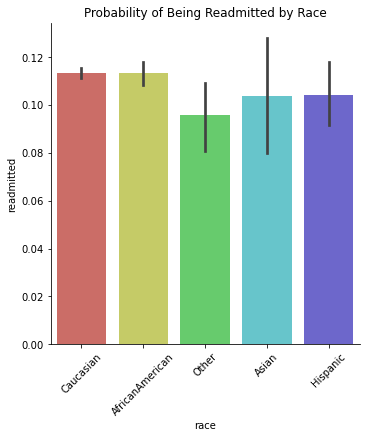

In [14]:
# Show probability of race
sns.set_palette("hls")
sns.catplot(x = "race", y = "readmitted",
            data = df, kind = "bar", height= 5)
plt.xticks(rotation=45)
plt.title("Probability of Being Readmitted by Race")
plt.show()

The majority of patients are Caucasian. However the probability of being readmitted is similar across races. Asians and Hispanics have a slightly lower probability of being readmitted. 

### EDA - Gender

In [15]:
# Show count of gender
df['gender'].value_counts()

Female             52833
Male               45219
Unknown/Invalid        1
Name: gender, dtype: int64

In [16]:
# Drop unknown/invalid valid
df = df.drop(df[df["gender"]=="Unknown/Invalid"].index, axis=0)

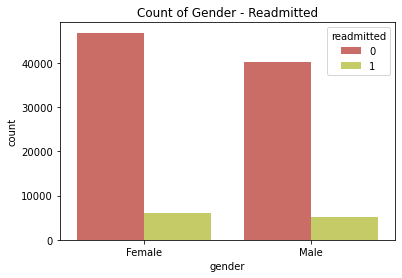

In [17]:
# Show count of gender
sns.set_palette("hls")
sns.countplot(x='gender', hue= "readmitted", data = df)
plt.title("Count of Gender - Readmitted")
plt.show()

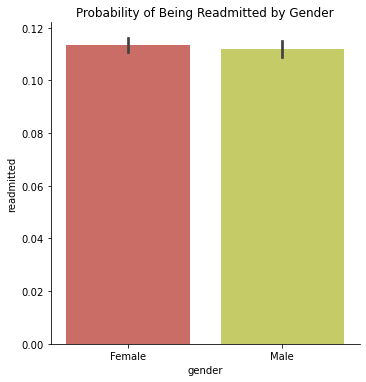

In [18]:
# Show probability of race
sns.set_palette("hls")
sns.catplot(x = "gender", y = "readmitted",
            data = df, kind = "bar", height= 5)
plt.title("Probability of Being Readmitted by Gender")
plt.show()

There are slightly more female than male patients. However both females and males have equal probabilities of being readmitted. 

### EDA - Age

In [19]:
# Show count of gender
df['age'].value_counts()

[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

Here, we convert the age category from categorical to numeric, using the mean of each bracket. Since age is ordinal, this allows to preserve the information instead of dealing with age as a binary dummy variable. 

In [20]:
# Take average of each age to remove brackets and convert to numeric
df['age'] = df['age'].replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

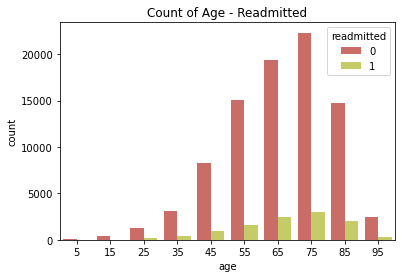

In [21]:
# Show count of age
sns.set_palette("hls")
sns.countplot(x='age', hue= "readmitted", data = df)
plt.title("Count of Age - Readmitted")
plt.show()

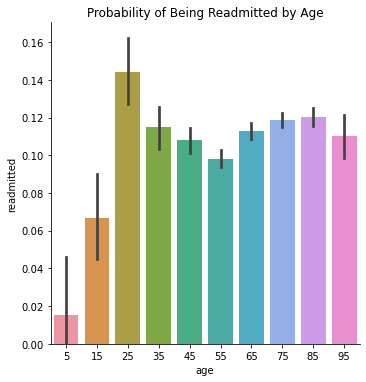

In [22]:
# Show probability of age
sns.set_palette("hls")
sns.catplot(x = "age", y = "readmitted",
            data = df, kind = "bar", height= 5)
plt.title("Probability of Being Readmitted by Age")
plt.show()

As expected, most diabetic patients are elderly: 55 - 85 years old. The probability of being readmitted is higher for 25 year olds, and also for patients 65 years or older.  

### EDA - Time in Hospital 
Number of days in treatment

In [23]:
# Show count of TIH
df['time_in_hospital'].value_counts()

3     17049
2     16441
1     13489
4     13434
5      9699
6      7320
7      5694
8      4276
9      2928
10     2287
11     1809
12     1424
13     1185
14     1017
Name: time_in_hospital, dtype: int64

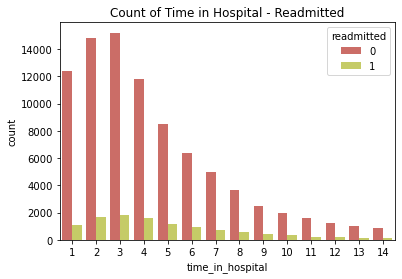

In [24]:
# Show count of TIH
sns.set_palette("hls")
sns.countplot(x='time_in_hospital', hue= "readmitted", data = df)
plt.title("Count of Time in Hospital - Readmitted")
plt.show()

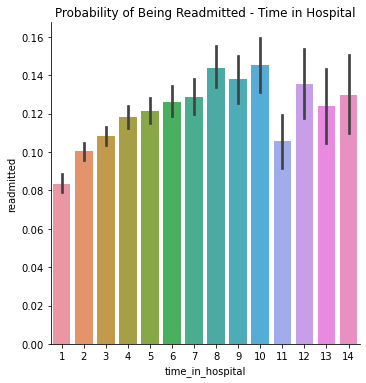

In [25]:
# Show probability of time in hospital
sns.set_palette("hls")
sns.catplot(x = "time_in_hospital", y = "readmitted",
            data = df, kind = "bar", height= 5)
plt.title("Probability of Being Readmitted - Time in Hospital")
plt.show()

Most patients spend 1-4 days in the hospital. The probability of being readmitted increases after spending one day at the hospital.  

### EDA - Number of Procedures¶
Number of procedures performed

In [26]:
# Show count of num_procedures
df['num_procedures'].value_counts()

0    44574
1    20029
2    12383
3     9210
6     4811
4     4076
5     2969
Name: num_procedures, dtype: int64

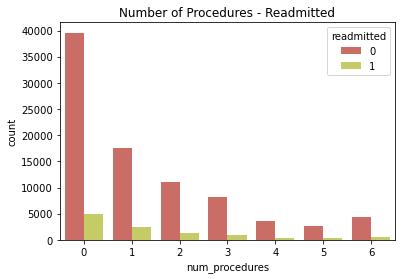

In [27]:
# Show count of num_procedures
sns.set_palette("hls")
sns.countplot(x='num_procedures', hue= "readmitted", data = df)
plt.title("Number of Procedures - Readmitted")
plt.show()

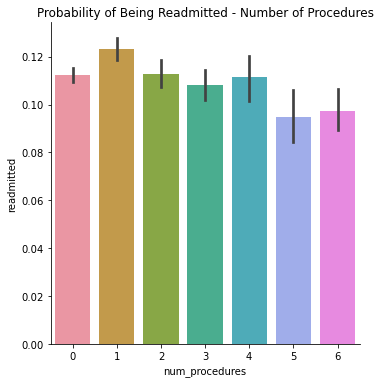

In [28]:
# Show probability of num_procedures
sns.set_palette("hls")
sns.catplot(x = "num_procedures", y = "readmitted",
            data = df, kind = "bar", height= 5)
plt.title("Probability of Being Readmitted - Number of Procedures")
plt.show()

The majority of patients have 0 procedures. The probability of being readmitted is fairly equal, regardless the number of procedures that one has had. 

### EDA - Number of Medications¶
Number of distinct medications administered during previous admission

In [29]:
# Show count of num_medications
df['num_medications'].value_counts()

13    5885
12    5816
15    5621
11    5592
14    5520
      ... 
75       2
70       2
81       1
79       1
74       1
Name: num_medications, Length: 75, dtype: int64

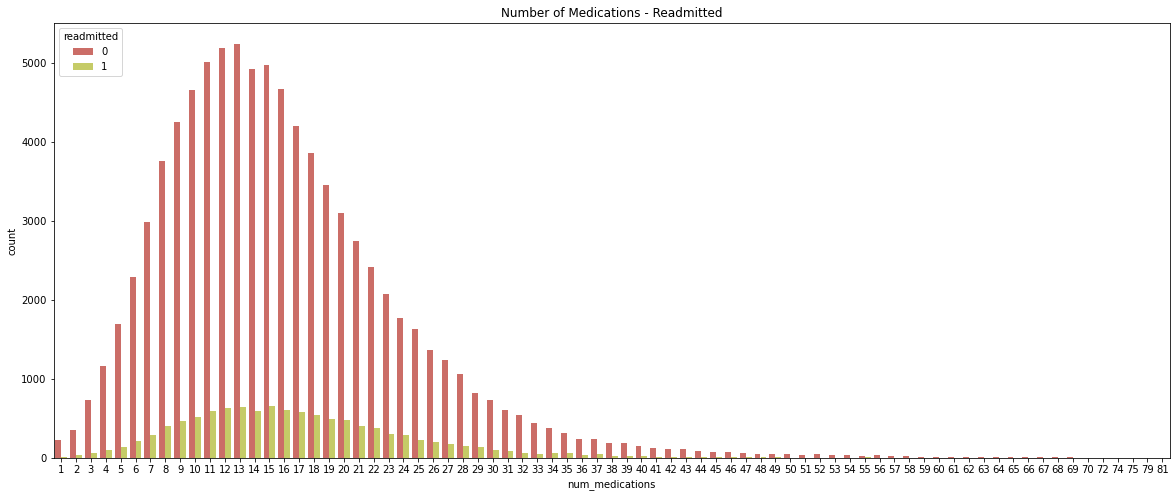

In [30]:
# Show count of num_medications
sns.set_palette("hls")
plt.figure(figsize=(20,8))
sns.countplot(x='num_medications', hue= "readmitted", data = df)
plt.title("Number of Medications - Readmitted")
plt.show()

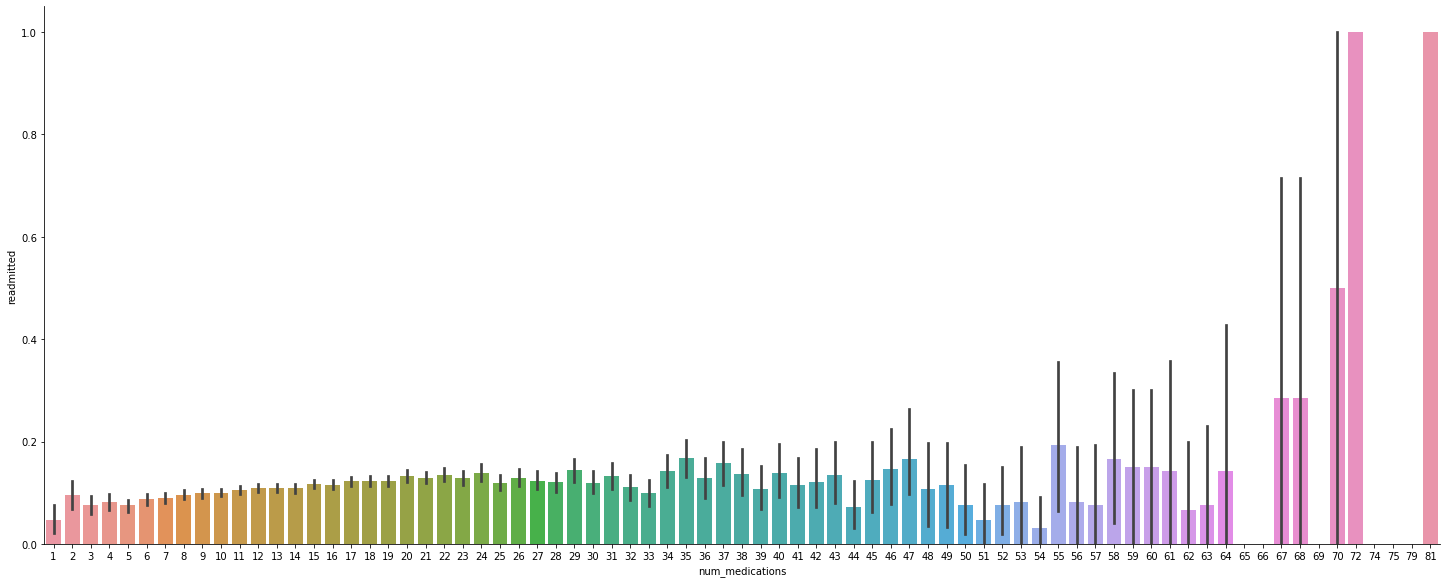

In [31]:
# Show probability of num_medications
sns.set_palette("hls")
sns.catplot(x = "num_medications", y = "readmitted",
            data = df, kind = "bar", height=8, aspect=20/8)

The majority of patients take 7 -17 medications during their encounter with diabetes. The probability of being readmitted is greater the more medications one takes.

## Feature Selection

In [32]:
# Include only the features we are interested in
df_transformed = df[["race", "gender", "age", "time_in_hospital", 'num_procedures', 'num_medications', "readmitted"]]
df_transformed

,race,gender,age,time_in_hospital,num_procedures,num_medications,readmitted
1,Caucasian,Female,15,3,0,18,0
2,AfricanAmerican,Female,25,2,5,13,0
3,Caucasian,Male,35,2,1,16,0
4,Caucasian,Male,45,1,0,8,0
5,Caucasian,Male,55,3,6,16,0
...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,75,3,0,16,0
101762,AfricanAmerican,Female,85,5,3,18,0
101763,Caucasian,Male,75,1,0,9,0
101764,Caucasian,Female,85,10,2,21,0


### Export data to CSV

In [33]:
df_transformed.to_csv("resources/cleaned_data.csv")